### Core 1-01: Signal Characterization

#### Purpose
이 노트북의 목적은 항체 Developability 관련 지표가  
**이산적인 판단 대상이 아니라, 연속적이며 경계에서 흔들리는 신호**임을 확인하는 데 있습니다. 

- 분류 X
- 기준선 X
- 좋고/나쁨 판단 X

오직 다음 질문에만 답하고자 합니다. 
> "이 값들은 설계 판단을 곧바로 트리거하기엔 얼마나 애매한가?"

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

DATA_PATH = "../../data_csv/Antibody_Developability.csv"

df = pd.read_csv(DATA_PATH)

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
df.head()
df.columns # 컬럼 고정

Rows: 246
Columns: 9


Index(['antibody_id', 'antibody_name', 'vh_protein_sequence',
       'vl_protein_sequence', 'light_aligned_aho', 'heavy_aligned_aho',
       'hc_subtype', 'lc_subtype',
       'hierarchical_cluster_IgG_isotype_stratified_fold'],
      dtype='object')

##### Developability Signal Columns

이 데이터에는 명시적인 `stability_score`, `aggregation_score` 같은
정량 지표가 존재하지 않습니다.

대신 본 프로젝트에서는 다음을 **Developability 관련 신호(signal)**로 간주합니다. 

- 서열 기반 정보 (VH / VL sequence)
- AHo alignment 결과
- heavy / light chain subtype
- hierarchical cluster (isotype stratified)

본 단계에서는:
- **값을 새로 계산하지 않는다**
- **서열을 수치화하지 않는다**

오직 **이미 주어진 구조적 구분과 분포가 얼마나 연속적/중첩적인지**를 봅니다. 

In [4]:
categorical_cols = [
    "hc_subtype",
    "lc_subtype",
    "hierarchical_cluster_IgG_isotype_stratified_fold"
] # Categorical Signal 분포 확인 (subtype / cluster가 깔끔히 분리되는지 확인)

for col in categorical_cols:
    print(f"\n[{col}]")
    display(df[col].value_counts())


[hc_subtype]


hc_subtype
IgG1    169
IgG4     46
IgG2     31
Name: count, dtype: int64


[lc_subtype]


lc_subtype
Kappa     217
Lambda     29
Name: count, dtype: int64


[hierarchical_cluster_IgG_isotype_stratified_fold]


hierarchical_cluster_IgG_isotype_stratified_fold
0    54
4    49
1    49
2    48
3    46
Name: count, dtype: int64

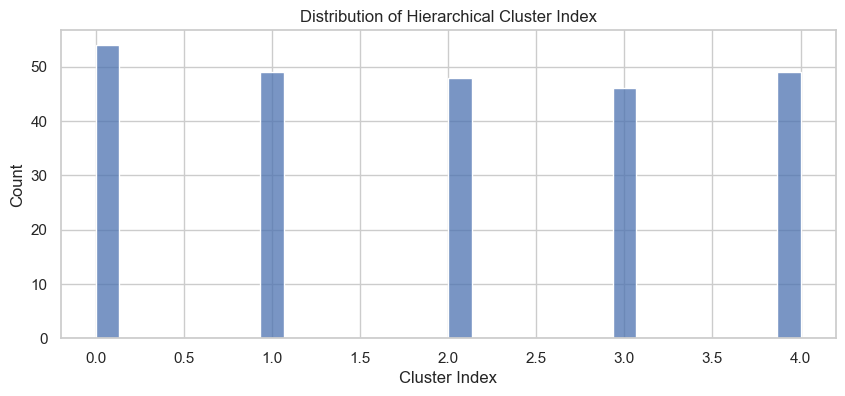

In [5]:
plt.figure(figsize=(10, 4))
sns.histplot(
    df["hierarchical_cluster_IgG_isotype_stratified_fold"],
    bins=30,
    kde=False
)
plt.title("Distribution of Hierarchical Cluster Index")
plt.xlabel("Cluster Index")
plt.ylabel("Count")
plt.show() # Cluster 크기 분포 시각화 (“클러스터 = 안정/불안정”이라는 착각을 방지하기 위한 시각화)

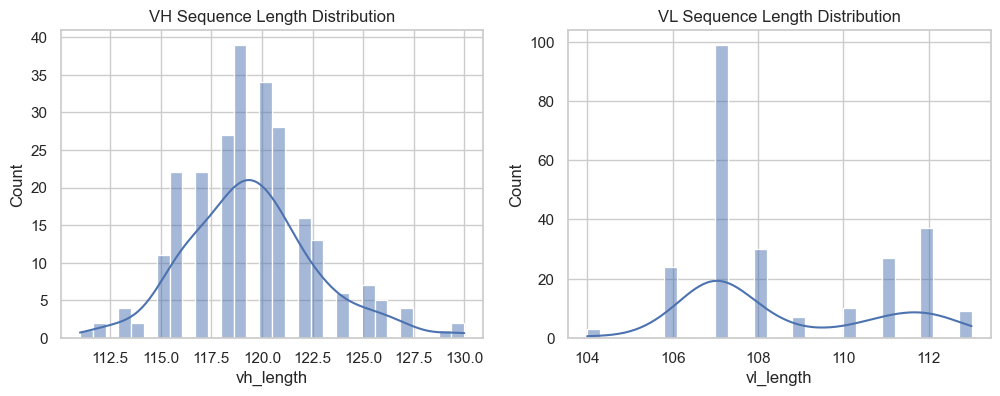

In [6]:
df["vh_length"] = df["vh_protein_sequence"].str.len()
df["vl_length"] = df["vl_protein_sequence"].str.len()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df["vh_length"], bins=30, kde=True)
plt.title("VH Sequence Length Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df["vl_length"], bins=30, kde=True)
plt.title("VL Sequence Length Distribution")

plt.show() # 서열 길이 분포 (서열 길이조차도 뚜렷한 cutoff 없이 연속적임을 확인)

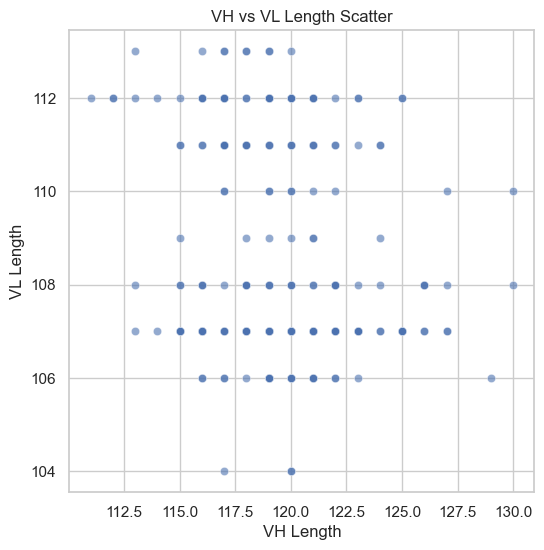

In [7]:
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x="vh_length",
    y="vl_length",
    data=df,
    alpha=0.6
)
plt.title("VH vs VL Length Scatter")
plt.xlabel("VH Length")
plt.ylabel("VL Length")
plt.show() # VH vs VL 길이 관계 (명확한 분리선이 없는 연속적 관계 확인)

### Core 1-01 Summary: Signal Characterization

확인된 사실은 다음과 같다.

- 항체 Developability 관련 신호들은
  - 명확히 분리된 이산 클래스가 아니다
  - 경계가 겹치며 연속적으로 분포한다
- 서열 길이, subtype, cluster 어떤 기준에서도
  - "여기서부터 위험 / 여기까지 안전" 같은 선은 자연스럽지 않다

#### 이 단계에서 **의도적으로 하지 않은 것**
- cutoff 정의 ❌
- 라벨 생성 ❌
- 우수/불량 분류 ❌

#### 여기서 얻은 것
> 이 신호들은 설계 판단을 즉시 트리거하기에는  
> 구조적으로 애매하고 흔들릴 수밖에 없습니다. 

이 감각이 **Core 2–3 설계 판단 불안정성**의 출발점이 될 것입니다.